# Readme
Places where solutions are required are marked with **#TODO**\
You will **NOT** need to modify any section not marked as #TODO to answer this question.\
Make sure the helper file. svd_transformation_helper.py is in the same folder as this .ipynb\
Make sure you have numpy, matplotlib and itertools packages installed for python

### In this notebook:
Part (b) has 3 subparts i, ii, and iii\
Part (c) has 4 subparts i, ii, iii and iv\
Part (d) has 2 subparts i,ii\
Part (e) has only 1 subpart

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from svd_transformation_helper import visualize_function
from svd_transformation_helper import matrix_equals, is_orthonormal

In [2]:
DISABLE_CHECKS = False #Set this to True only if you get Value Errors about inputs even 
#when you are sure that what you are inputting is correct.
#WARNING: Setting this to True and entering wrong inputs can lead to all kinds of crazy results/errors


def visualize(U = np.identity(2), D = np.ones(2), VT = np.identity(2), num_grid_points_per_dim = 200,\
    disable_checks = DISABLE_CHECKS, show_original = True, show_VT = True, show_DVT = True, show_UDVT = True):
    '''
    Inputs:
    A has singular value decomposition A = U np.diag(D) VT
    U: 2 x 2 orthonormal matrix represented as a np.array of shape (2,2)
    D: Diagonal entries corresponding to the diagonal matrix in SVD represented as a np.array of shape (2,)
    VT: 2 x 2 orthonormal matrix represented as a np.array of shape (2,2)
    num_grid_points_per_dim: Spacing of points used to represent circle (Decrease this if plotting is slow)
    disable_checks: If False then have checks in  place to make sure dimensions of VT, U are correct, etc. 
    show_original: If True plots original unit circle and basis vectors
    show_VT: If True plots transformation by VT
    show_DVT: If True plots transformation by DVT
    show_UDVT: If True plots transformation by UDVT
    '''   

    visualize_function(U=U, D=D, VT=VT, num_grid_points_per_dim=num_grid_points_per_dim, disable_checks=disable_checks,\
                     show_original=show_original, show_VT=show_VT, show_DVT=show_DVT, show_UDVT=show_UDVT)
    

# Effect of the linear transformation by an orthonormal matrix $V^T$
A 2 x 2 orthonormal matrix can be viewed as a linear transformation that performs some combination of rotations and reflections. Note that both rotation and reflection are operations that preserve the length of vectors and the angle between them.

## $V^T$ as a rotation matrix
First we set $V^T$ as a counter-clockwise rotation matrix. 

### (b) i: Fill in the function "get_RCC(theta)" to return a 2 x 2 matrix that, when applied to a vector x, rotates it by theta radians counter clockwise.

Example: If $V^T = RCC\left(\frac{\pi}{4}\right)$ and x = $\begin{bmatrix}1 \\ 0\end{bmatrix}$, then,

$V^T \begin{bmatrix}1 \\ 0\end{bmatrix}$ = $\begin{bmatrix}\frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix}$


In [3]:
def get_RCC(theta):
    '''
    Returns a 2 x 2 orthonormal matrix that rotates x by theta radians counter-clockwise
    '''
    
#     RCC = np.identity(2) #TODO: Solution to (b) i. Change this line by filling in the correct reflection matrix
    RCC = np.array([[np.cos(theta), np.sin(-theta)], [np.sin(theta), np.cos(theta)]])
    ############################################################################################
    #Some assertions (WARNING: Do not modify below code)
    if DISABLE_CHECKS is False:
        if not isinstance(RCC, np.ndarray):
                raise ValueError('RCC must be a np.ndarray')
        if len(RCC.shape) != 2 or (RCC.shape != np.array([2,2])).any():
                raise ValueError('RCC must have shape [2,2]')   
    return RCC

### get_RCC(theta) function test
If the function get_RCC(theta) is defined correctly then you should not get any ERROR statement here.

In [4]:
x = np.array([[1,0]]).T
V_test = get_RCC(np.pi/4)
y = V_test @ x
expected_y = np.array([[1/np.sqrt(2), 1/np.sqrt(2)]]).T
print("y:")
print(y)
print("Expected y:")
print(expected_y)
if not matrix_equals(y, expected_y):
    print("ERROR: y does not match expected_y. Check if function get_RCC(theta) is completed correctly")
else:
    print("MATCHED: y matches expected_y!")

y:
[[0.70710678]
 [0.70710678]]
Expected y:
[[0.70710678]
 [0.70710678]]
MATCHED: y matches expected_y!


Next we observe how $V^T$ transforms the unit circle and unit basis vectors when:

1) $V^T = RCC\left(\frac{\pi}{4}\right)$

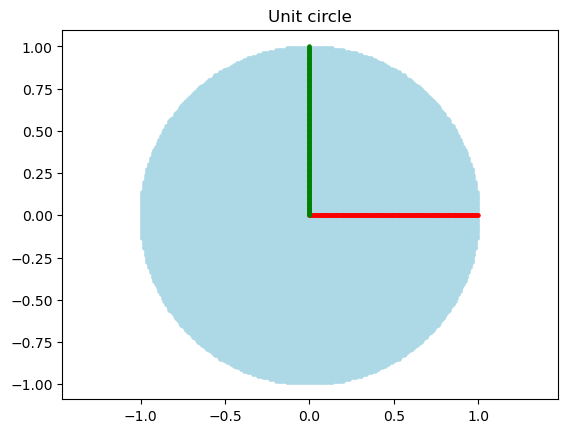

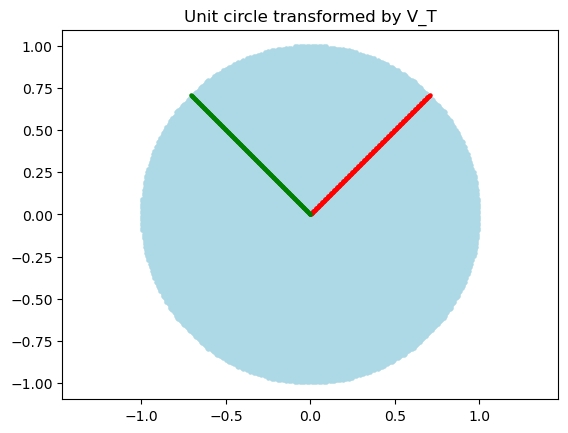

In [5]:
VT_1 = get_RCC(np.pi/4)
visualize(VT = VT_1, show_DVT=False, show_UDVT=False)

2) $V^T = RCC\left(\frac{-\pi}{3}\right)$

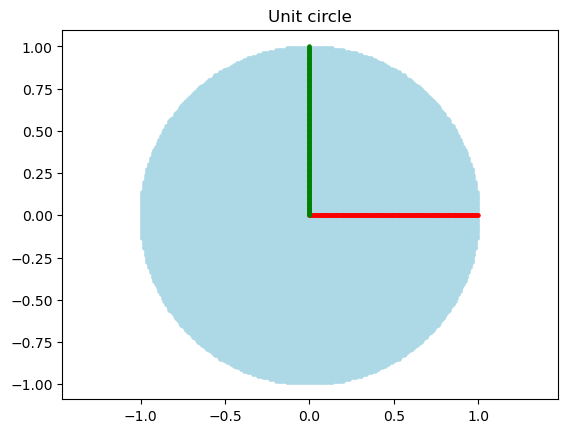

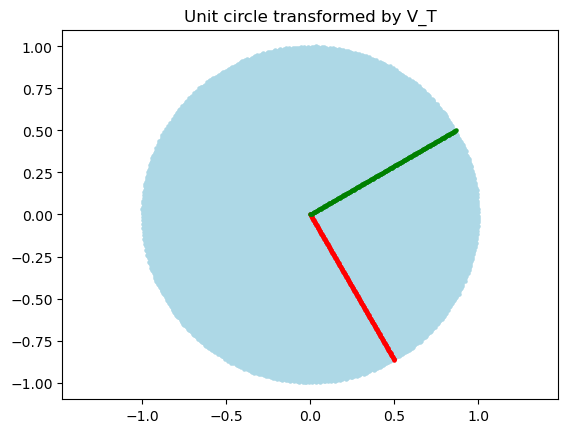

In [6]:
VT_2 = get_RCC(-np.pi/3)
visualize(VT = VT_2, show_DVT=False, show_UDVT=False)

Next we consider the case where $V^T$ is a reflection matrix.

## $V^T$ as a reflection matrix
A reflection matrix is another type of orthonormal matrix. 

### (b) ii: Fill in the function "get_RFx()" to return a 2 x 2 matrix that when applied to a vector x reflects it about the x-axis.

Example: If $V^T =RFx()$ and $x = \begin{bmatrix}1 \\ 1\end{bmatrix}$, then,

$V^T \begin{bmatrix}1 \\ 1\end{bmatrix} = \begin{bmatrix}1 \\ -1\end{bmatrix}$


In [7]:
def get_RFx():
    '''
    Returns a 2 x 2 orthonormal matrix that reflects about x-axis
    '''

    
#     RFx = np.identity(2) #TODO: Solution to (b) ii. change this line by filling in the correct reflection matrix
    RFx = np.array([[1, 0], [0, -1]], dtype = 'float')
    ############################################################################################
    #Some assertions (WARNING: Do not modify below code)
    if DISABLE_CHECKS is False:
        if not isinstance(RFx, np.ndarray):
                raise ValueError('RFx must be a np.ndarray')
        if len(RFx.shape) != 2 or (RFx.shape != np.array([2,2])).any():
                raise ValueError('RFx must have shape [2,2]') 
    return RFx

### get_RFx() function test
If the function get_RFx() is defined correctly then you should see a MATCHED statement here.

In [8]:
x = np.array([[1,1]]).T
V_test = get_RFx()
y = V_test @ x
expected_y = np.array([[1, -1]]).T
print("y:")
print(y)
print("Expected y:")
print(expected_y)
if not matrix_equals(y, expected_y):
    print("ERROR: y does not match expected_y. Check if function get_RFx() is completed correctly")
else:
    print("MATCHED: y matches expected_y!")

y:
[[ 1.]
 [-1.]]
Expected y:
[[ 1]
 [-1]]
MATCHED: y matches expected_y!


$V^T = RFx()$

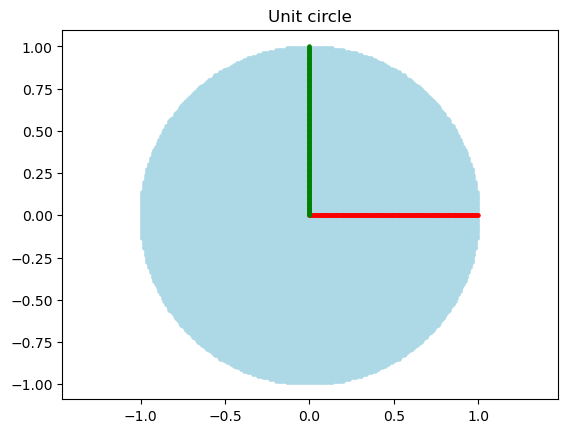

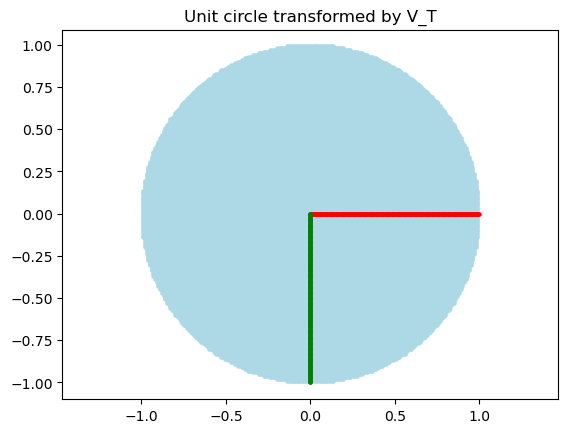

In [9]:
VT_3 = get_RFx()
visualize(VT = VT_3, show_DVT=False, show_UDVT=False)

## $V^T$ as a composition of reflection and rotation matrix
In general an orthonormal transformation can be viewed as compositions of rotation and reflection operators. 
Next we observe the effect of setting

$V^T = RFx()\cdot RCC\left(\frac{\pi}{4}\right)$

VT_4 is orthonormal?:  True


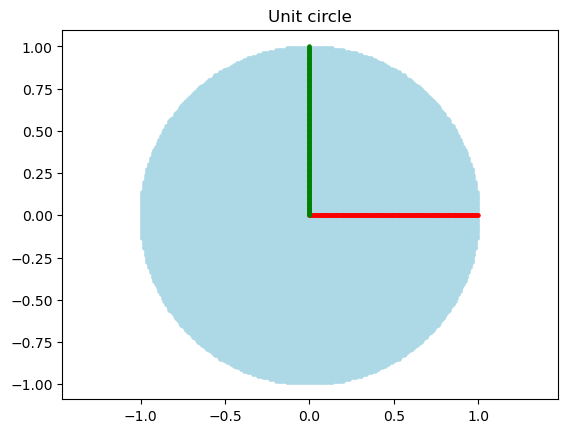

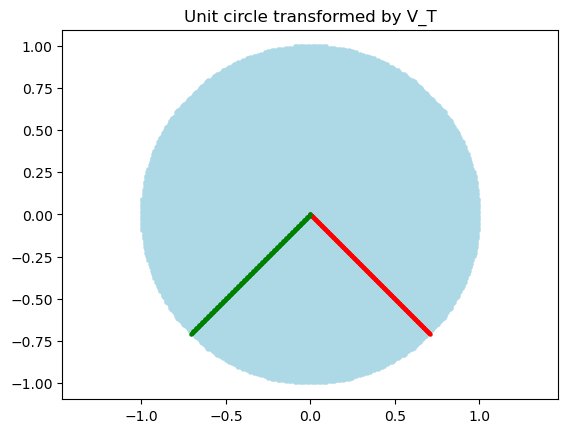

In [10]:
VT_4 = VT_3 @ VT_1
#Check that VT_4 is still orthonormal
print("VT_4 is orthonormal?: ", is_orthonormal(VT_4))
visualize(VT = VT_4, show_DVT=False, show_UDVT=False)

### (b) iii: Comment on the effect of $V^T = RCC\left(\frac{\pi}{4}\right)\cdot RFx()$. Is it same as the case when $V^T = RFx()\cdot RCC\left(\frac{\pi}{4}\right)$?

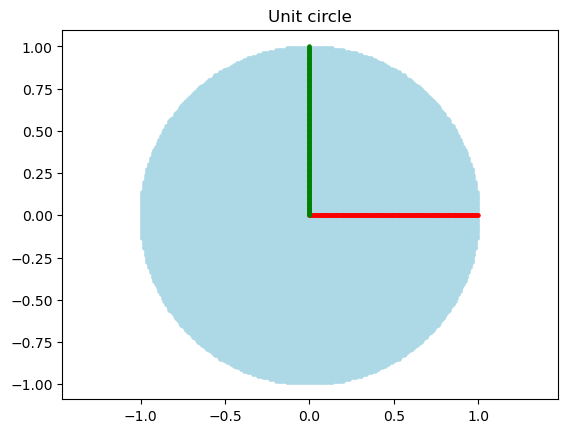

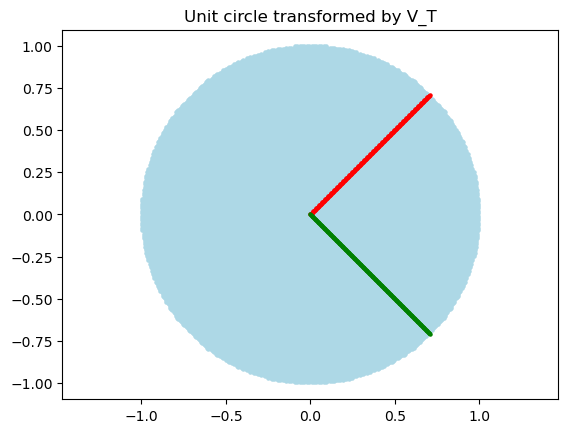

In [11]:
VT_5 =  VT_1 @ VT_3
visualize(VT = VT_5, show_DVT=False, show_UDVT=False)

### #TODO: Fill in solution to (b) iii here
In this case $RFx()$ first reflects the green basis vector, $e_y$, about the $x$ axis first and then  $RCC\left(\frac{\pi}{4}\right)$ rotates everything counter-clockwise by $\frac{\pi}{4}$ radians. 
Its effect is not same as that of the case before when $V^T = RFx()\cdot RCC\left(\frac{\pi}{4}\right).$

# Effect of linear transformation by diagonal matrix D
The diagonal matrix D with entries $\sigma_1$ and $\sigma_2$, transforms the unit circle into an ellipse with x direction scaled by $\sigma_1$ and y direction scaled by $\sigma_2$.

If  $\sigma_1 > \sigma_2$, then the major axis of the ellipse will be along the x-axis.

If  $\sigma_1 < \sigma_2$, then the major axis of the ellipse will be along the y-axis.

If $\sigma_1 = \sigma_2$, then the ellipse will have both axis equal (i.e it is a circle).

Note that multiplying by D, does not rotate or reflect points in any way. It is a purely scaling operation where different directions get scaled by different values based on entries of D.

### (c) i: Comment on the length of major and minor axis of the ellipse and their orientation with respect to X and Y axis when D has entries [3, 2]. Here V is identity.

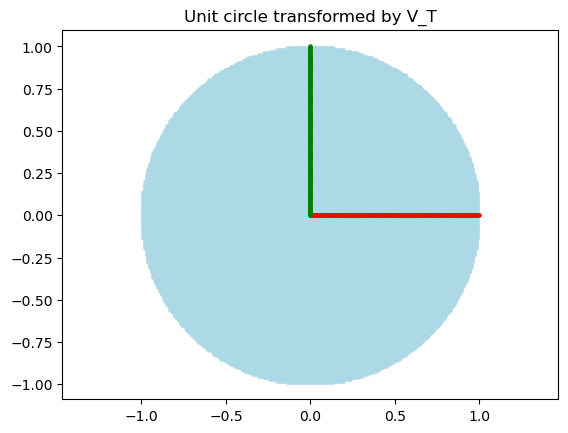

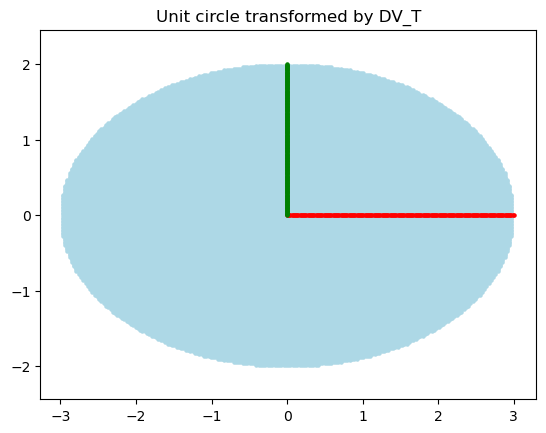

In [12]:
D_1 = np.array([3, 2])
visualize( D = D_1, show_original=False, show_UDVT=False)

### #TODO: Fill in solution to (c) i here
The major axis of the ellipse has length 6 while the minor axis has length 4. The major axis is along the $x$ axis.

### (c) ii: Comment on the length of major and minor axis of the ellipse and their orientation with respect to X and Y axis when D has entries [2, 3]. Here V is the identity matrix.

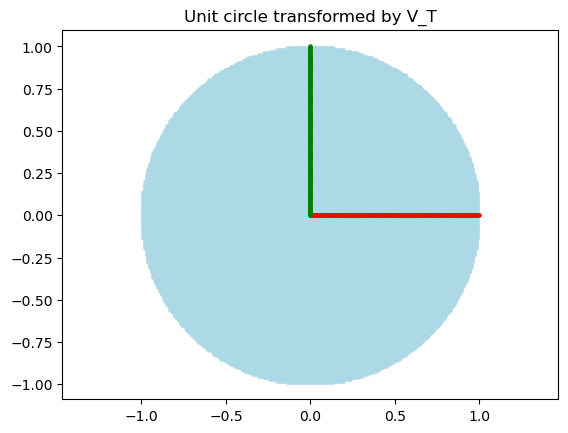

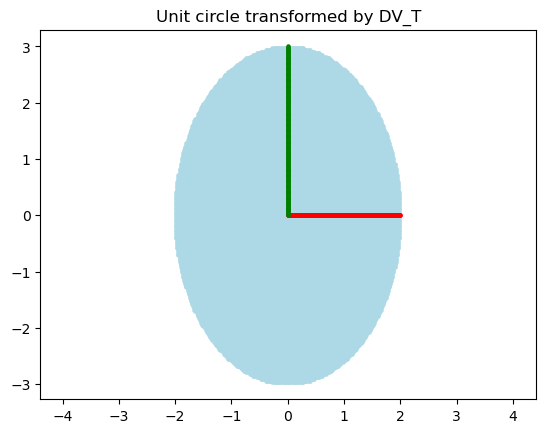

In [13]:
D_2 = np.array([2, 3])
visualize( D = D_2,  show_original=False, show_UDVT=False)

### #TODO Fill in solution to (c) ii here
The major axis has length 6 while the minor axis has length 4. This time the major axis is along the $y$ axis.

### (c) iii: What can you say about the ellipse when D has entries [2, 2]? Here V is the identity matrix.

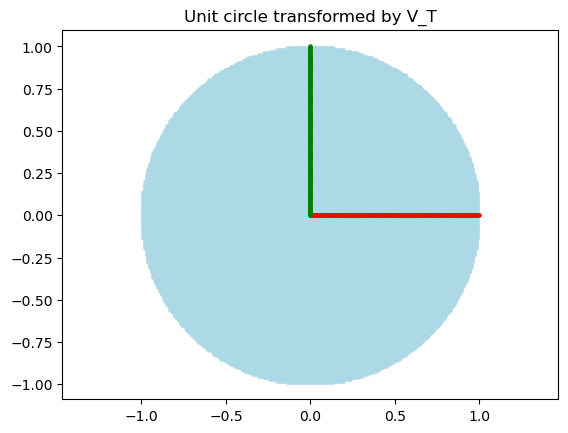

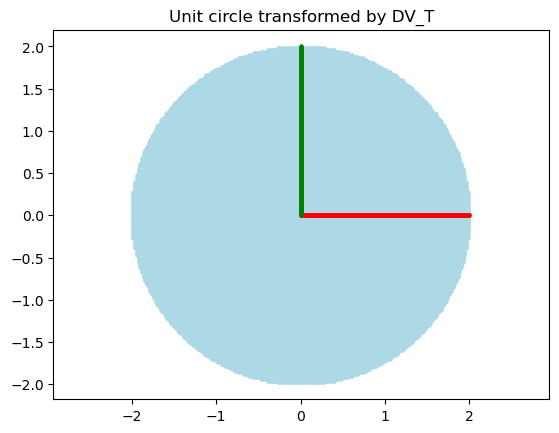

In [14]:
D_3 = np.array([2, 2])
visualize( D = D_3, show_original=False, show_UDVT=False)

### #TODO Fill in solution to (c) iii here
In this case, the ellipse is actually a circle of radius 2.

### (c) iv: What can you say about the ellipse when D has entries [2, 0]? Here V is the identity matrix.

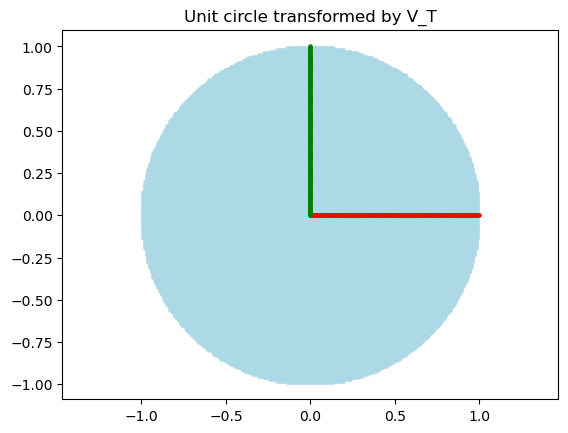

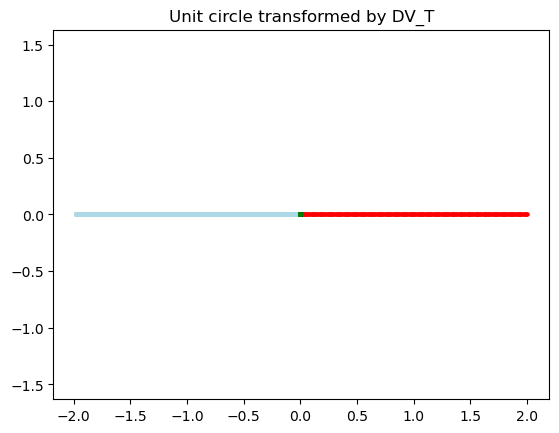

In [15]:
D_4 = np.array([2, 0])
visualize( D = D_4, show_original=False, show_UDVT=False)

### #TODO: Fill in solution to (c) iv here
The ellipse is in fact a line. The component in the $y$ direction goes to zero since the second entry of $D$ is zero.

# Effect of the linear transformation by an orthonormal matrix $U$
As we saw before for $V^T$, a 2 x 2 orthonormal matrix can be viewed as a linear transformation that performs some combination of rotations and reflections. 

### (d) i: Comment on the effect of $U  = RCC\left(\frac{\pi}{4}\right)$ as in cell below.  The value of $D$ is in the code below and $V$ is the identity matrix.  What happened to the ellipse?  Did the length of the major and minor axis change?

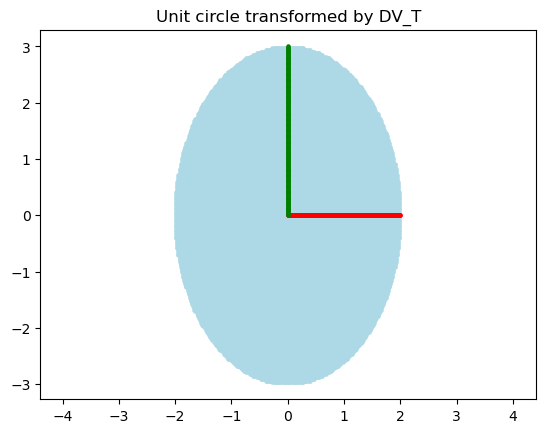

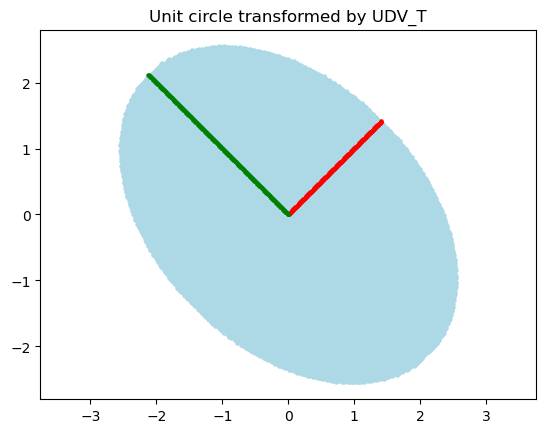

In [16]:
U_1 = get_RCC(np.pi/4)
visualize( U = U_1, D =np.array([2,3]), show_original=False, show_VT=False)

### #TODO: Fill in solution to (d) i here
The ellipse was rotated counter clockwise by $\frac{\pi}{4}$ radians. The length of the major and minor axis remain unchanged. This is consistent with the length preserving property of orthonormal matrices.

### (d) ii: Comment on the effect of $U = RFx()$ as in cell below. The value of $D$ is in the code below and $V$ is the identity matrix. What happened to the ellipse? Did length of major and minor axis change?

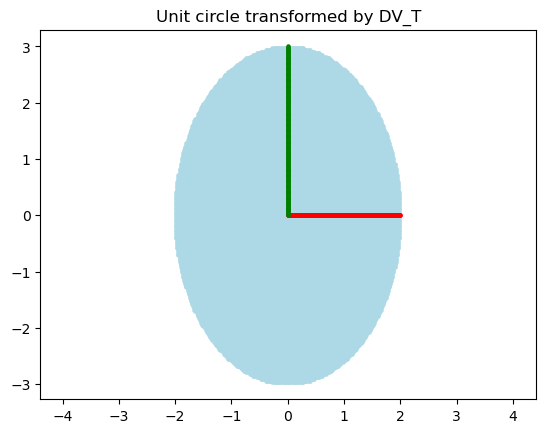

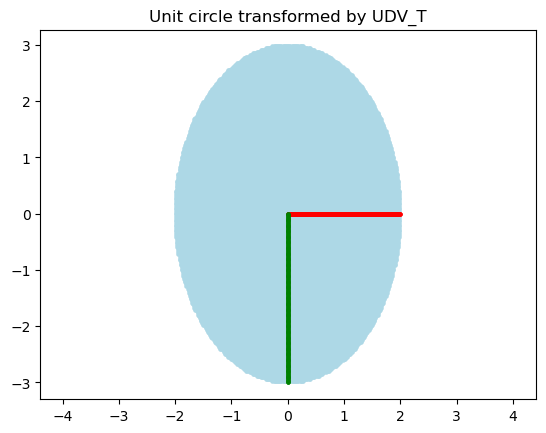

In [17]:
U_2 = get_RFx()
visualize( U = U_2, D =np.array([2,3]),  show_original=False, show_VT=False)

### #TODO Fill in solution to (d) ii here
The ellipse was reflected about the $x$ axis as can be seen from the basis vectors in red and green.The length of the major and minor axis remain unchanged. 

# Putting everything together. Effect of linear transformation by $UDV^T$


### Case I

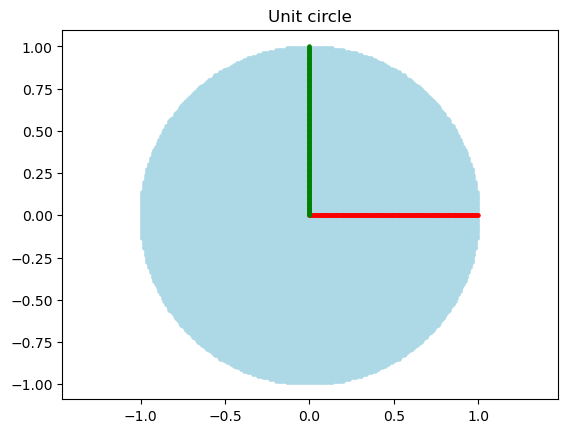

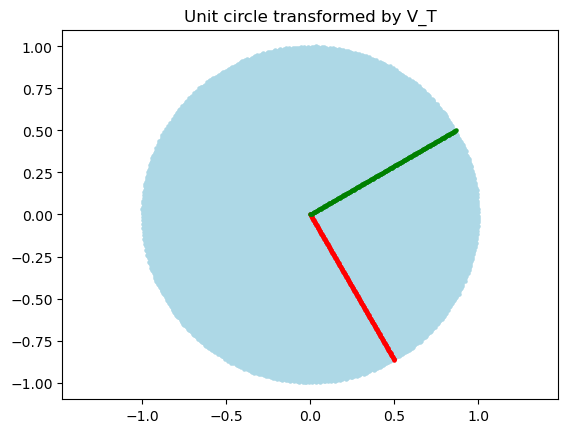

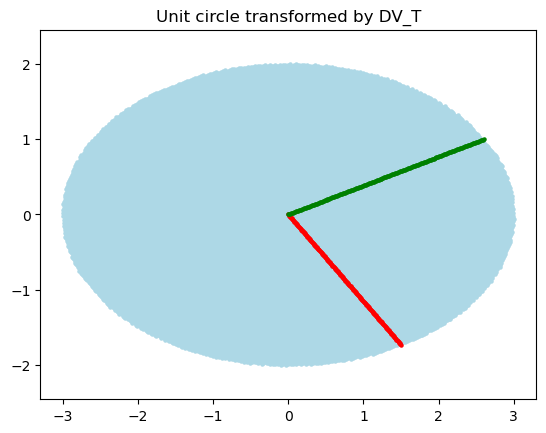

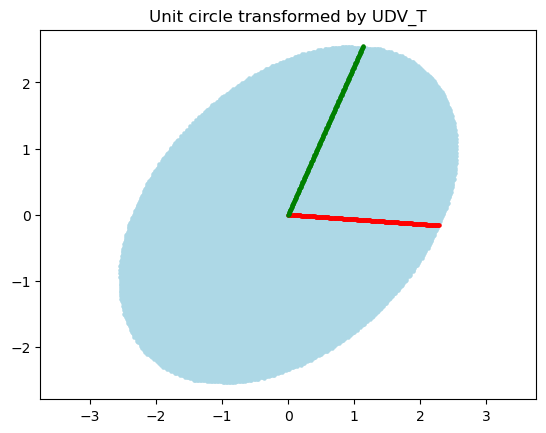

In [18]:
U = get_RCC(np.pi/4)
VT = get_RCC(-np.pi/3)
D = np.array([3,2])
visualize(U = U, VT= VT, D=D)

The above figures show the transformation after each step. 

### Case II

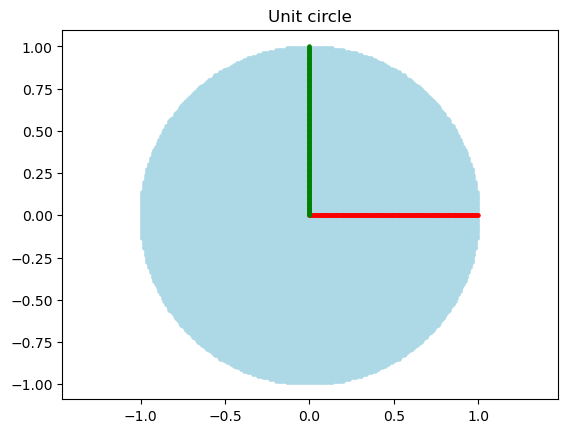

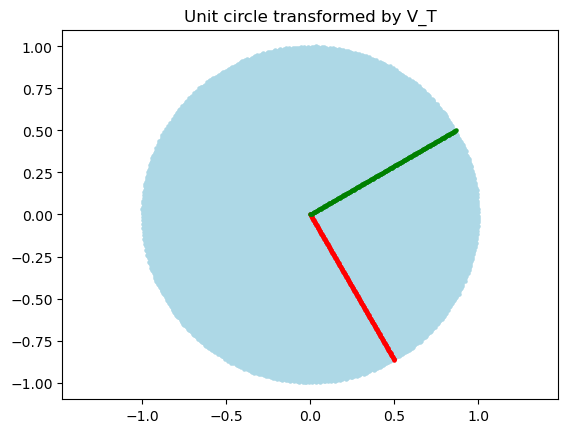

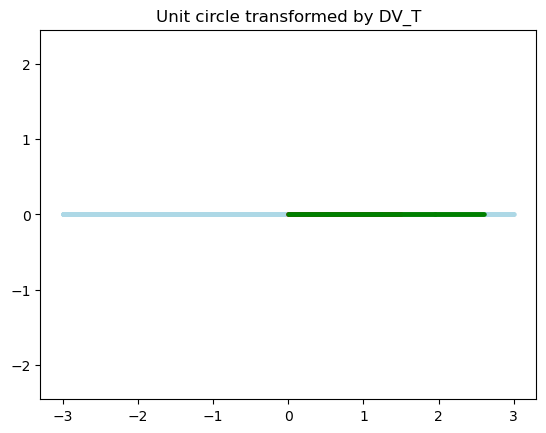

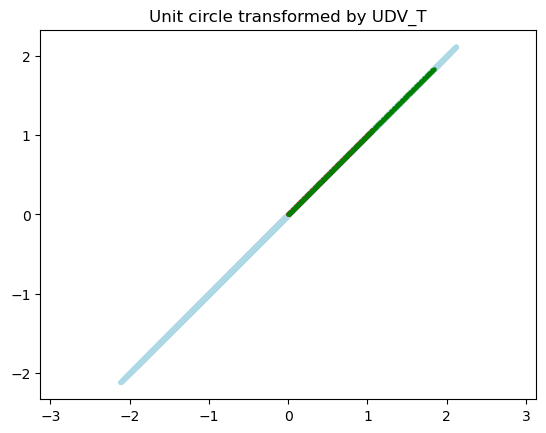

In [19]:
U = get_RCC(np.pi/4)
VT = get_RCC(-np.pi/3)
D = np.array([3,0])
visualize(U = U, VT= VT, D=D)

The above figures show the transformation after each step. 

### Case III

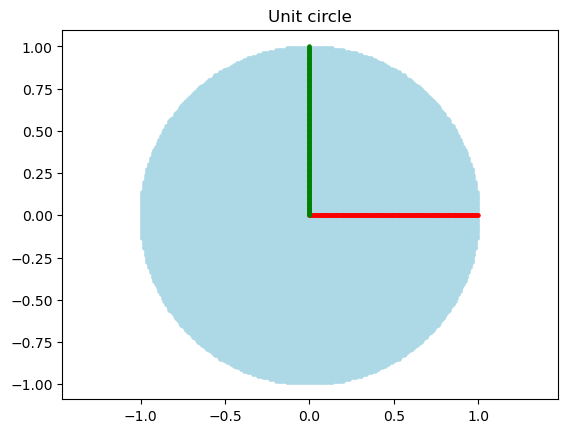

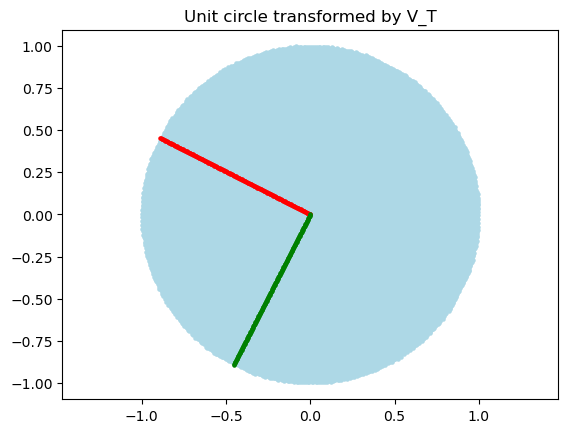

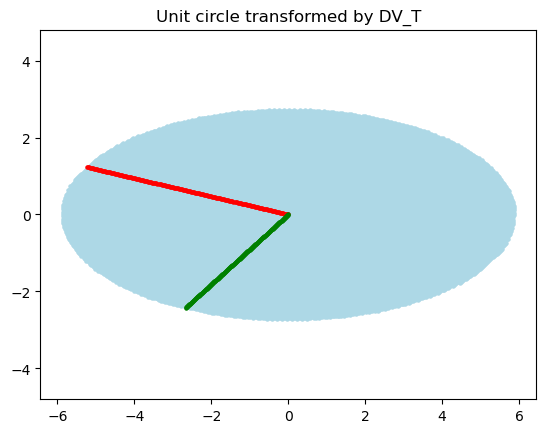

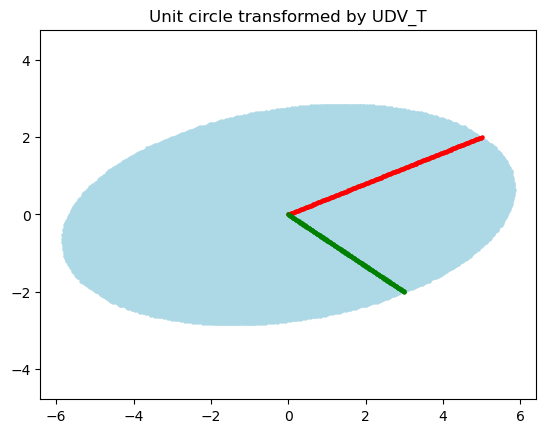

In [20]:
A = np.array([[5, 3], [2, -2]])
U,D,VT = np.linalg.svd(A)
visualize(U = U, D=D, VT=VT)

### (e) For case III, based on the figures obtained by running the cell, answer the following questions:
 1) Is $V^T$ a  pure rotation, pure reflection or combination of both?
 
 2) Let $\sigma_1$ and $\sigma_2$ denote the entries of the diagonal matrix in SVD of A, with $\sigma_1 > \sigma_2$? What is an approximate value of $\frac{\sigma_1}{\sigma_2}$?
  
 3) Is $U$ a pure rotation, pure reflection or combination of both?

### #TODO Fill in solution to (e) here
1) $V^T$ is a pure rotation counter-clocwise by approximately 150 degrees.

2) Since length of the major axis of the ellipse is approximately 12, and that of the minor axis is approximately 6, $\frac{\sigma_1}{\sigma_2}$ is approximately 2. 

3) $U$ is a reflection about $x$ axis followed by approximately 180 degree rotation counter-clockwise.

# Exploration Area (Not part of homework question)
You are free to visualize the effect of the SVD transformation on the unit circle for whatever matrix you desire

In [21]:
# #Sample format 1
# U = get_RCC(np.pi/4)
# VT = get_RCC(-np.pi/3)
# D = np.array([3,2])
# visualize(U = U, VT= VT, D=D)

In [22]:
# #Sample format 2
# A = np.array([[5, 3], [2, -2]])
# U,D,VT = np.linalg.svd(A)
# visualize(U = U, D=D, VT=VT)